# Ecommerce Data 

This analysis would be focused on data obtained from Ecommerce website Jumia.com. They deal on a range of items, but this dataset contains only android mobile devices. The task would be approached from a seller's perspectives. The compnay is focused on selling low priced phones and are interested in knowing phones that meet the demand for low priced devices. 

### Summary

Some of the statistical tools employed in performing the analysis include: mean, median and correlation. Outliers were also identified using box plot to determine extreme values. After several analysis, the recommended phone brands were Gionee, Nokia, LG and Infinix

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the dataset
data = pd.read_csv('Jumia_clean.csv')

In [3]:
data.head()

,brand,current_price,old_price,discount,description,ratings,times_reviewed,rom,ram,battery,camera,sim port,screen_dim,android_ver
0,Gionee,48000,73630,-35,Gionee K3 (M100) 4GB+64GB 6.22 Inch HD+ Androi...,3.50,10,64.0,4.0,5000.0,13.0,Dual SIM,6.22,8.1
1,Nokia,59520,119660,-50,"7， 5.2-inch (4GB, 64GB ROM) Android 7.1, 16MP ...",3.80,10,64.0,4.0,3000.0,16.0,Dual Sim,5.20,7.1
2,UMIDIGI,25990,29990,-13,"A3S Android 10 Global Band 3950mAh 5.7"" Smartp...",4.30,99,32.0,4.0,3950.0,13.0,Triple Slots,5.70,10.0
3,Nokia,42990,70485,-39,3.2 3GB RAM 32GB 6.26 Inch 13MP Camera Dual SI...,4.05,104,32.0,3.0,4000.0,13.0,Dual SIM,6.26,9.0
4,UMIDIGI,25990,29990,-13,"A3S Android 10 Global Band 3950mAh 5.7"" Smartp...",3.90,148,32.0,4.0,3950.0,13.0,Triple Slots,5.70,10.0


## Exploring the Price  column

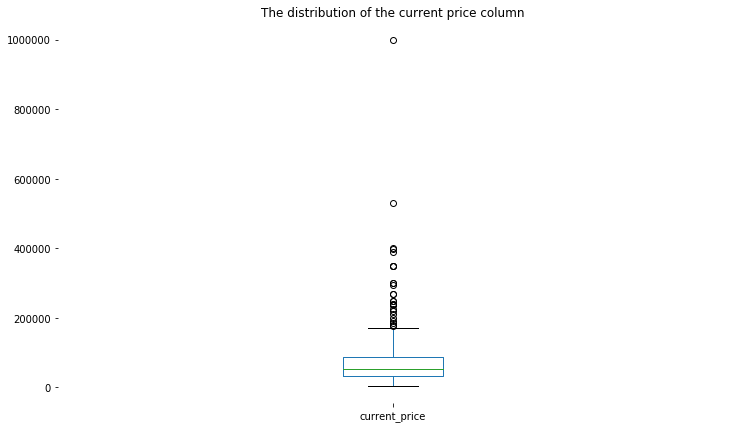

In [4]:
# Identifying outliers
data.current_price.plot.box(title='The distribution of the current price column', figsize = (12,7))
sns.despine(left = True, bottom = True);

## Approach

Since the company is focused on selling low cost devices, it is imperative to know the where majority (80%) of phones prices lie. In using the 80th quartile, it would allow for a broader range of phones as compared to when the median is used.

In [5]:
# Calculating the 80th percentile
below_80th = data[data['current_price'] <= data['current_price'].quantile(.80)]
below_80th.head()

,brand,current_price,old_price,discount,description,ratings,times_reviewed,rom,ram,battery,camera,sim port,screen_dim,android_ver
0,Gionee,48000,73630,-35,Gionee K3 (M100) 4GB+64GB 6.22 Inch HD+ Androi...,3.50,10,64.0,4.0,5000.0,13.0,Dual SIM,6.22,8.1
1,Nokia,59520,119660,-50,"7， 5.2-inch (4GB, 64GB ROM) Android 7.1, 16MP ...",3.80,10,64.0,4.0,3000.0,16.0,Dual Sim,5.20,7.1
2,UMIDIGI,25990,29990,-13,"A3S Android 10 Global Band 3950mAh 5.7"" Smartp...",4.30,99,32.0,4.0,3950.0,13.0,Triple Slots,5.70,10.0
3,Nokia,42990,70485,-39,3.2 3GB RAM 32GB 6.26 Inch 13MP Camera Dual SI...,4.05,104,32.0,3.0,4000.0,13.0,Dual SIM,6.26,9.0
4,UMIDIGI,25990,29990,-13,"A3S Android 10 Global Band 3950mAh 5.7"" Smartp...",3.90,148,32.0,4.0,3950.0,13.0,Triple Slots,5.70,10.0


### Exploring the Number of brands

We need to know the number of brands that have devices that are within the 80th percentile, then drop brands whose representation are less than a threshold. Our threshold in this case will be brands that their listed devices are less than 10.

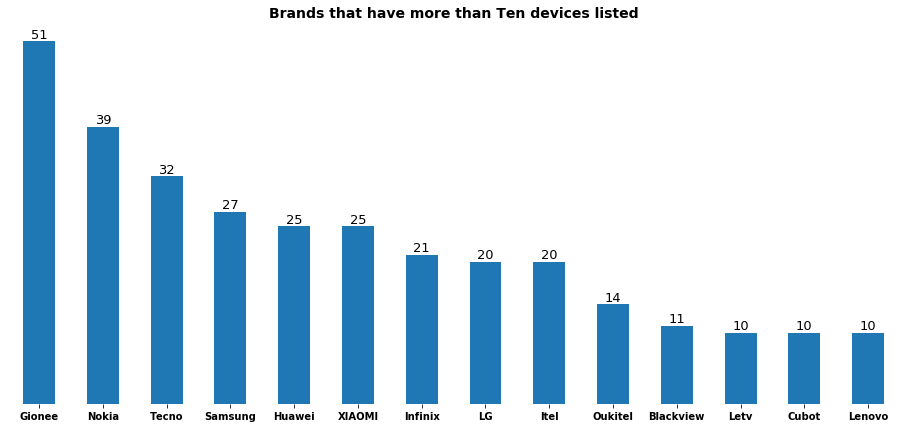

In [6]:
plt.figure(figsize=(16,7))

# Brands that are listed ten times or more
ten_abo = below_80th.brand.value_counts()[below_80th.brand.value_counts() >= 10]
ten_abo.plot.bar()

for x,y in enumerate(ten_abo):
    plt.text(x,y+0.5,y,ha='center',fontsize=13)

plt.xticks(rotation=0, weight='bold')
sns.despine(left=True, bottom=True)
plt.title('Brands that have more than Ten devices listed', size = 14, weight='bold')
plt.yticks([]);

In [7]:
# Removing the brands that have lower than 10 values
clean = below_80th[below_80th.brand.isin(ten_abo.index)].reset_index(drop=True)

clean.head()

,brand,current_price,old_price,discount,description,ratings,times_reviewed,rom,ram,battery,camera,sim port,screen_dim,android_ver
0,Gionee,48000,73630,-35,Gionee K3 (M100) 4GB+64GB 6.22 Inch HD+ Androi...,3.50,10,64.0,4.0,5000.0,13.0,Dual SIM,6.22,8.1
1,Nokia,59520,119660,-50,"7， 5.2-inch (4GB, 64GB ROM) Android 7.1, 16MP ...",3.80,10,64.0,4.0,3000.0,16.0,Dual Sim,5.20,7.1
2,Nokia,42990,70485,-39,3.2 3GB RAM 32GB 6.26 Inch 13MP Camera Dual SI...,4.05,104,32.0,3.0,4000.0,13.0,Dual SIM,6.26,9.0
3,Gionee,37350,49990,-25,"S11 Lite 5.7-Inch HD (4GB,64GB ROM) Android 7....",4.25,1145,64.0,4.0,4000.0,13.0,Dual SIM,5.70,7.1
4,Gionee,37970,55000,-31,"S11 Lite 5.7-Inch HD (4GB,64GB ROM) Android 7....",4.25,668,64.0,4.0,4000.0,13.0,Dual SIM,5.70,7.1


## Factors Affecting the Price

In order to continue the analysis, it is important to understand the interaction between the price and other phone specifications. The interaction between price and these specifications would be a determinant of how we will drill down on our analysis. 

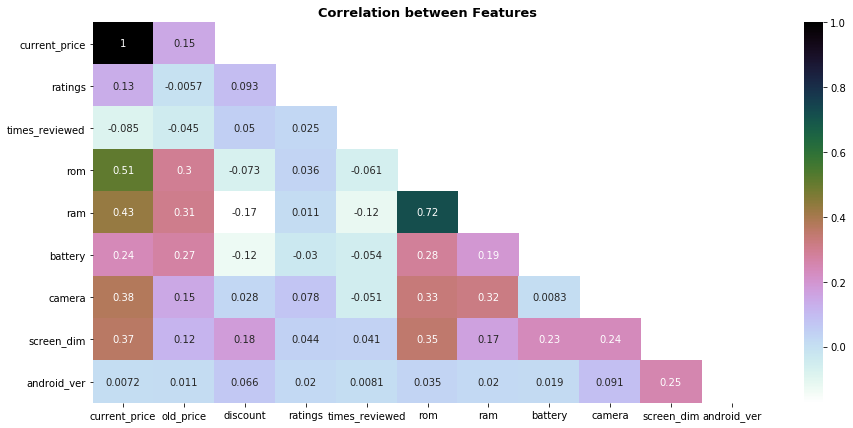

In [8]:
# corelation between the features on our data
plt.figure(figsize=(15,7))
corr_data = below_80th.corr().drop(['old_price', 'discount'])
sns.heatmap(corr_data, annot=True, mask=np.triu(corr_data, k=2), cmap='cubehelix_r')
plt.title('Correlation between Features', weight='bold', size=13);

In [9]:
# factors influencing the prices of phones
below_80th.corr()['current_price'].sort_values(ascending=False).drop(['current_price', 'old_price', 'discount'])

rom               0.509567
ram               0.429712
camera            0.380826
screen_dim        0.366539
battery           0.240282
ratings           0.134552
android_ver       0.007201
times_reviewed   -0.084859
Name: current_price, dtype: float64

### Camera Quality

From our correlation analysis, it shows camera quality has the highest influence on the price of a phone, thus we will explore the various camera quality of the various phones listed and pick the top five qualities. We would also perform an analysis of the user rating of these top five qualities.

In [10]:
# Frequency distribution of the camera column
clean.camera.value_counts()

13.00    198
16.00     44
5.00      25
8.00      14
2.00       8
48.00      8
12.00      8
20.00      4
3.00       2
3.15       1
1.30       1
0.30       1
25.00      1
Name: camera, dtype: int64

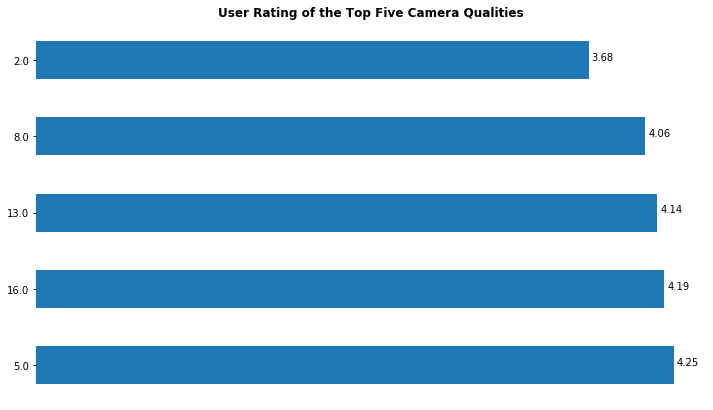

In [11]:
# Since there are some cameras that are only listed once or twice, we will drop those values
clean = clean[clean.camera.isin(clean.camera.value_counts().head().index)]

# plotting the above graph
cam_piv = clean.pivot_table(index='camera', values='ratings').sort_values('ratings', ascending = False)
cam_piv.plot.barh(legend=False,figsize=(12,7))
sns.despine(left=True, bottom=True)

# Rounding up the top five camera qualities for uniformity
vals  = []
for i in cam_piv.values:
    for a in i:
        vals.append(round(a,2))

plt.title('User Rating of the Top Five Camera Qualities', weight='bold')
for x,y in enumerate(vals):
    plt.text(y+0.02,x,y)
plt.ylabel('')
plt.xticks([]);

### Rom Column

Rom is the next most influential factor that affects the prices of phones, **however, the rom (internal storage) of a phone is not isolated, as it usually is accompanied by the ram (random access memory) of the phone**. Thus to avoid a false representation of values, **it is important to join these columns together to better understand the relationship between both of them** and how they influence the consumer experience. 

In [12]:
# creating the ram_rom column
clean['ram_rom'] = clean.ram.apply(lambda x: str(x)) + 'ram' + " " + clean.rom.apply(lambda x: str(x)) + 'rom'

# Frequency distribution of the ram_rom column
print('The top seven storage option for devices are: ', [i for i in clean.ram_rom.value_counts().head(7).index])

The top seven storage option for devices are:  ['4.0ram 64.0rom', '4.0ram 32.0rom', '3.0ram 32.0rom', '1.0ram 16.0rom', '2.0ram 32.0rom', '2.0ram 16.0rom', '1.0ram 8.0rom']


In [13]:
# removing the least listed ram_rom values
clean = clean[clean['ram_rom'].isin(clean.ram_rom.value_counts().head(7).index)].reset_index(drop=True)

# user rating of the top ram rom combinations
clean.pivot_table(index = 'ram_rom', values = 'ratings', 
             aggfunc = np.mean).sort_values(by = 'ratings', ascending = False).head(7)

,ratings
ram_rom,
1.0ram 8.0rom,4.361538
1.0ram 16.0rom,4.261667
4.0ram 32.0rom,4.204902
4.0ram 64.0rom,4.142857
2.0ram 16.0rom,4.084211
2.0ram 32.0rom,4.020833
3.0ram 32.0rom,3.981633


### Screen Dimension

Screen dimension of the phone also play a vital role in determining the price of devices, so it is important to explore and also drill down on the various screen dimensions available. 

In [14]:
# Most occuring screen dimension
clean.screen_dim.value_counts().head(8)

5.5    40
5.8    36
5.7    32
5.0    21
6.0    17
5.2    14
6.6    12
6.2     9
Name: screen_dim, dtype: int64

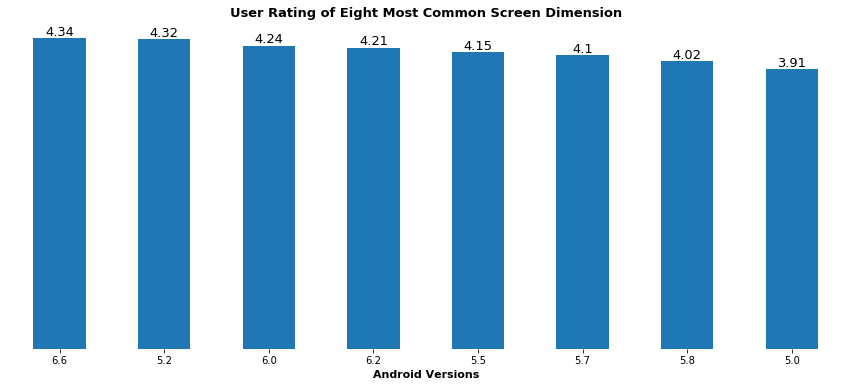

In [15]:
# User rating of the top 8 screen dimensions
scr = clean.pivot_table(index = 'screen_dim', values = 'ratings', 
                        aggfunc = np.mean).sort_values(by = 'ratings', ascending = False)

# picking the top eight values
gr = scr.loc[clean.screen_dim.value_counts().head(8).index].sort_values('ratings', 
                     ascending = False)

gr.index = [round(i,3) for i in np.array(gr['ratings'].index)] # removing the trailing figures for the screen dimension

# plotting the top 8 screen dimensions
gr.plot.bar(figsize = (15,6), legend = False)
plt.xticks(rotation = 0)

# laabelling the bars
for x,y in enumerate(round(gr['ratings'],2)):
    plt.text(x,y+0.04,y,ha='center',fontsize=13)

# removing the y axis
plt.yticks([])
plt.xlabel('Android Versions', weight='bold', size=11)
plt.title('User Rating of Eight Most Common Screen Dimension', weight='bold', size=13)
sns.despine(left= True, bottom = True);

# Selecting the top eight screen dimensions
clean = clean[clean['screen_dim'].isin(gr.index)]

### Battery Capacity

The battery capacity is next most influential factor affecting the prices of phones, thus we would perform an exploratory analysis of the column to understand how it is distributed.

In [16]:
# Frequency of battery capacities
clean.battery.value_counts()

4000.0     113
5000.0      32
3000.0       8
6020.0       4
2600.0       3
2400.0       2
10000.0      2
2800.0       2
2970.0       2
2990.0       2
2200.0       2
3200.0       1
2050.0       1
2500.0       1
3080.0       1
2000.0       1
3060.0       1
3500.0       1
3100.0       1
6000.0       1
Name: battery, dtype: int64

In [17]:
# User rating of the top two battery capacities
bat = clean.pivot_table(index = 'battery', values = 'ratings')
bat.loc[clean.battery.value_counts().head(2).index].sort_values('ratings', ascending = False)

,ratings
5000.0,4.246875
4000.0,4.091150


In [18]:
# Selecting the two most popular battery types
clean = clean[clean['battery'].isin(clean.battery.value_counts().head(2).index)]

### Android Versions

From the correlation analysis, the role of Android versions in influencing the price of phones is quite negligible, however, we would still perform an analysis to better understand how it affects the user experience. 

In [19]:
# Top most common android versions
print(clean.android_ver.value_counts().head())

8.1    82
7.1    26
7.0    11
9.0    11
8.0     7
Name: android_ver, dtype: int64


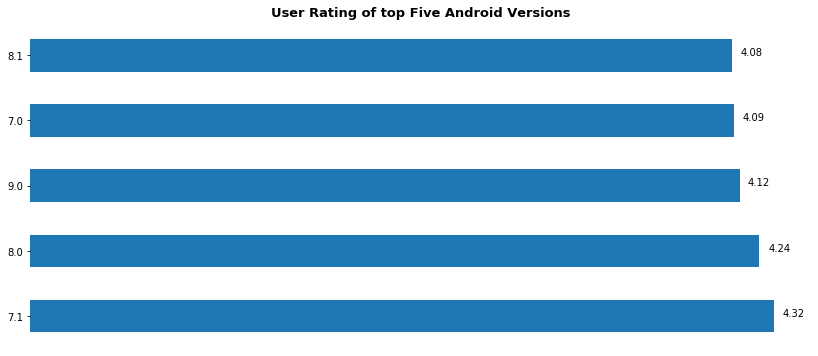

In [20]:
# user rating of the android versions
android = clean.pivot_table(index = 'android_ver', values = 'ratings').sort_values(ascending = False, by = 'ratings')
and_gr = android.loc[clean.android_ver.value_counts().head().index].sort_values(ascending = False,
          by='ratings')

and_gr.plot(kind='barh', legend = False, figsize =(14,6))
plt.title('User Rating of top Five Android Versions', size = 13, weight='bold')
for x,y in enumerate(round(and_gr['ratings'], 2)):
    plt.text(y+0.05,x,y)
sns.despine(bottom = True, left = True)
plt.xticks([]);

## Conclusion

In [21]:
# adjusting for android versions
clean[clean.android_ver.isin(and_gr.index)]['brand'].value_counts()

Gionee       32
Nokia        20
LG           17
Infinix      16
Tecno        12
Samsung      10
Itel          9
XIAOMI        6
Cubot         4
Lenovo        3
Blackview     2
Huawei        2
Letv          2
Oukitel       2
Name: brand, dtype: int64

In [22]:
# without adjusting for android versions
clean.brand.value_counts()

Gionee       33
Nokia        20
LG           18
Infinix      17
Tecno        12
Samsung      11
Itel          9
XIAOMI        8
Cubot         4
Huawei        3
Lenovo        3
Oukitel       3
Blackview     2
Letv          2
Name: brand, dtype: int64

After requisite exploration and analysis of the data, we can adequately recommend the sale of **Gionee, Nokia, LG and Infinix** phones to the company. 